In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Reading the dataset
df = pd.read_csv('/content/Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
#Checking information about the Data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
#Checking for duplicates
df.duplicated().sum()

0

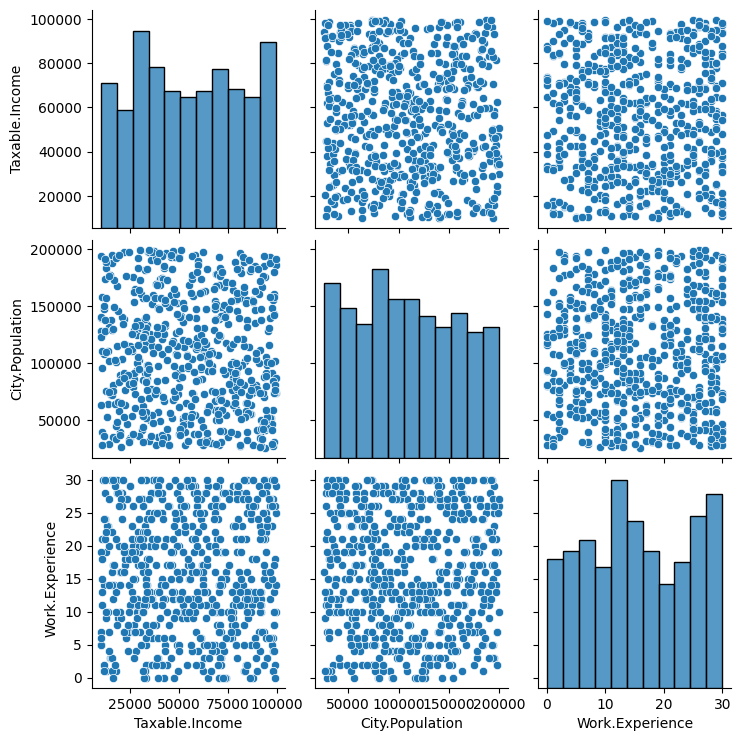

In [6]:
#Checking the distribution of the data for each attribute
sns.pairplot(df)
plt.show()

In [7]:
#Creating a column Fraud Check and Storing values where Taxable income is less than equal to 30000 as 1 (Risky)
#and 0 (Good) where taxable income is greater than 30000.
df['Fraud_Check'] = df['Taxable.Income'].apply(lambda x: 1 if x <= 30000 else 0)
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,0
596,YES,Divorced,69967,55369,2,YES,0
597,NO,Divorced,47334,154058,0,YES,0
598,YES,Married,98592,180083,17,NO,0


In [8]:
#Checking the count of each value
df.Fraud_Check.value_counts()

0    476
1    124
Name: Fraud_Check, dtype: int64

In [9]:
#Converting the categorical variables to numerical
le = LabelEncoder()
for col in ['Undergrad', 'Marital.Status', 'Urban']:
  df[col] = le.fit_transform(df[col])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [10]:
#Spliting the data into dependent and independent variables
x = df.drop(['Fraud_Check', 'Taxable.Income'], axis=1)
y = df['Fraud_Check']

In [11]:
#Splitting the data into training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state =88)

In [12]:
#Creating a parameter dictionary for GridSearchCV
params = {'criterion': ["entropy", "gini"], 'splitter': ['best', 'random'],
          'max_depth': [None, 2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10],
          'min_samples_leaf' : [1, 2, 3, 4],
          'max_features': ['auto', 'sqrt', 'log2', None]}

In [13]:
#Initializing the DecisionTree model
model = DecisionTreeClassifier()

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
#Creating a GridSearchCV model to find the best parameters
grid = GridSearchCV(model, params)

In [18]:
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [19]:
print(grid.best_score_)
print(grid.best_params_)

0.8095238095238095
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [20]:
#Fitting the model with the best parameters
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       min_samples_leaf=4, splitter='random')

In [39]:
#Plotting Decision Tree For the model with the best parameters found using GridSearchCV
fig, axes = plt.subplots(nrows=1, ncols =1, figsize = (40,40), dpi =300)
axes.set_aspect('equal', 'box')
fn = df.columns
cn = ['Risky', 'Good']
tree.plot_tree(grid.best_estimator_, feature_names= fn, class_names= cn, filled = True,rounded = True, ax=axes)
plt.title("Decision Tree Using Best Parameters with GridSearchCV", fontsize =40)
plt.savefig('Decision_Tree(Fraud_Check).pdf')
plt.show()